# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Based on the work of Chanin Nantasenamat [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

---

## **Install conda and rdkit**

In [2]:
! mkdir -p ~/miniconda3
! curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh
! bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
! rm -rf ~/miniconda3/miniconda.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  102M  100  102M    0     0  5679k      0  0:00:18  0:00:18 --:--:-- 5545k
PREFIX=/Users/damaro/miniconda3
Unpacking payload ...
                                                                                
Installing base environment...





Preparing transaction: done
Executing transaction: done
installation finished.


In [3]:
! ~/miniconda3/bin/conda init bash
! ~/miniconda3/bin/conda init zsh

no change     /Users/damaro/miniconda3/condabin/conda
no change     /Users/damaro/miniconda3/bin/conda
no change     /Users/damaro/miniconda3/bin/conda-env
no change     /Users/damaro/miniconda3/bin/activate
no change     /Users/damaro/miniconda3/bin/deactivate
no change     /Users/damaro/miniconda3/etc/profile.d/conda.sh
no change     /Users/damaro/miniconda3/etc/fish/conf.d/conda.fish
no change     /Users/damaro/miniconda3/shell/condabin/Conda.psm1
modified      /Users/damaro/miniconda3/shell/condabin/conda-hook.ps1
no change     /Users/damaro/miniconda3/lib/python3.11/site-packages/xontrib/conda.xsh
no change     /Users/damaro/miniconda3/etc/profile.d/conda.csh
no change     /Users/damaro/.bash_profile

==> For changes to take effect, close and re-open your current shell. <==

no change     /Users/damaro/miniconda3/condabin/conda
no change     /Users/damaro/miniconda3/bin/conda
no change     /Users/damaro/miniconda3/bin/conda-env
no change     /Users/damaro/miniconda3/bin/activate
n

In [1]:
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.11.5/site-packages/')

Channels:
 - rdkit
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/damaro/miniconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          10 KB
    bottleneck-1.3.5           |  py311ha0d4635_0         118 KB
    brotli-1.0.9               |       h1a28f6b_7          18 KB
    brotli-bin-1.0.9           |       h1a28f6b_7          17 KB
    cairo-1.18.0               |       hd1e100b_0         877 KB  conda-forge
    certifi-2024.2.2           |  py311hca03da5_0         161 KB
    chardet-4.0.0              |py311hca03da5_1003         219 KB
    conda-24.1.0               |  py311hca03da5_0         1.2 MB
    contourpy-1.2.0            |  py311h48ca7d4_0         255 KB
    cycler-0.11.0              |     pyhd3eb1b0_0      

## **Load bioactivity data**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/damaro/Documents/Bioinformatics/bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,556.410,3.03508,4.0,11.0
1,510.623,4.84030,1.0,8.0
2,293.672,2.55080,2.0,3.0
3,300.343,2.65702,1.0,6.0
4,267.372,4.22234,0.0,2.0
...,...,...,...,...
90,337.314,2.31830,1.0,7.0
91,334.339,1.76140,2.0,8.0
92,363.377,2.46750,2.0,8.0
93,378.392,1.58340,3.0,9.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL470334,N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)...,inactive,10400.0
1,CHEMBL1358945,CCCc1cc(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)n2c...,inactive,999000.0
2,CHEMBL3191473,O=C(/C=C(/NCCO)C(F)(F)F)c1ccc(Cl)cc1,inactive,999000.0
3,CHEMBL1537858,Cc1cc(NC(=O)CSc2ncnc3ccccc23)no1,inactive,999000.0
4,CHEMBL1576855,CCOc1ccccc1N1Cc2cc(C)c(C)cc2C1,inactive,999000.0
...,...,...,...,...
90,CHEMBL3309990,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,10000.0
91,CHEMBL3309995,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,inactive,10000.0
92,CHEMBL3309997,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,inactive,10000.0
93,CHEMBL3309998,Nc1nc2c3ccc(NCCO)cc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,10000.0


Now, let's combine the 2 DataFrame

In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL470334,N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)...,inactive,10400.0,556.410,3.03508,4.0,11.0
1,CHEMBL1358945,CCCc1cc(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)n2c...,inactive,999000.0,510.623,4.84030,1.0,8.0
2,CHEMBL3191473,O=C(/C=C(/NCCO)C(F)(F)F)c1ccc(Cl)cc1,inactive,999000.0,293.672,2.55080,2.0,3.0
3,CHEMBL1537858,Cc1cc(NC(=O)CSc2ncnc3ccccc23)no1,inactive,999000.0,300.343,2.65702,1.0,6.0
4,CHEMBL1576855,CCOc1ccccc1N1Cc2cc(C)c(C)cc2C1,inactive,999000.0,267.372,4.22234,0.0,2.0
...,...,...,...,...,...,...,...,...
90,CHEMBL3309990,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,10000.0,337.314,2.31830,1.0,7.0
91,CHEMBL3309995,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,inactive,10000.0,334.339,1.76140,2.0,8.0
92,CHEMBL3309997,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,inactive,10000.0,363.377,2.46750,2.0,8.0
93,CHEMBL3309998,Nc1nc2c3ccc(NCCO)cc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,10000.0,378.392,1.58340,3.0,9.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.standard_value.describe()

count        95.000000
mean     363845.368421
std      435423.946836
min          10.000000
25%       57500.000000
50%      100000.000000
75%      999000.000000
max      999000.000000
Name: standard_value, dtype: float64

In [25]:
-np.log10( (10**-9)* 100000000 )

1.0

In [26]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [14]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [15]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL470334,N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)...,inactive,556.410,3.03508,4.0,11.0,10400.0
1,CHEMBL1358945,CCCc1cc(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)n2c...,inactive,510.623,4.84030,1.0,8.0,999000.0
2,CHEMBL3191473,O=C(/C=C(/NCCO)C(F)(F)F)c1ccc(Cl)cc1,inactive,293.672,2.55080,2.0,3.0,999000.0
3,CHEMBL1537858,Cc1cc(NC(=O)CSc2ncnc3ccccc23)no1,inactive,300.343,2.65702,1.0,6.0,999000.0
4,CHEMBL1576855,CCOc1ccccc1N1Cc2cc(C)c(C)cc2C1,inactive,267.372,4.22234,0.0,2.0,999000.0
...,...,...,...,...,...,...,...,...
90,CHEMBL3309990,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,337.314,2.31830,1.0,7.0,10000.0
91,CHEMBL3309995,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,inactive,334.339,1.76140,2.0,8.0,10000.0
92,CHEMBL3309997,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,inactive,363.377,2.46750,2.0,8.0,10000.0
93,CHEMBL3309998,Nc1nc2c3ccc(NCCO)cc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,378.392,1.58340,3.0,9.0,10000.0


In [16]:
df_norm.standard_value_norm.describe()

count        95.000000
mean     363845.368421
std      435423.946836
min          10.000000
25%       57500.000000
50%      100000.000000
75%      999000.000000
max      999000.000000
Name: standard_value_norm, dtype: float64

In [17]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL470334,N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)...,inactive,556.410,3.03508,4.0,11.0,4.982967
1,CHEMBL1358945,CCCc1cc(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)n2c...,inactive,510.623,4.84030,1.0,8.0,3.000435
2,CHEMBL3191473,O=C(/C=C(/NCCO)C(F)(F)F)c1ccc(Cl)cc1,inactive,293.672,2.55080,2.0,3.0,3.000435
3,CHEMBL1537858,Cc1cc(NC(=O)CSc2ncnc3ccccc23)no1,inactive,300.343,2.65702,1.0,6.0,3.000435
4,CHEMBL1576855,CCOc1ccccc1N1Cc2cc(C)c(C)cc2C1,inactive,267.372,4.22234,0.0,2.0,3.000435
...,...,...,...,...,...,...,...,...
90,CHEMBL3309990,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,337.314,2.31830,1.0,7.0,5.000000
91,CHEMBL3309995,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,inactive,334.339,1.76140,2.0,8.0,5.000000
92,CHEMBL3309997,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,inactive,363.377,2.46750,2.0,8.0,5.000000
93,CHEMBL3309998,Nc1nc2c3ccc(NCCO)cc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,378.392,1.58340,3.0,9.0,5.000000


In [18]:
df_final.pIC50.describe()

count    95.000000
mean      4.043032
std       1.110663
min       3.000435
25%       3.000435
50%       4.000000
75%       4.241666
max       8.000000
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [19]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL470334,N#Cc1ccc(COC[C@H]2O[C@@H](n3c(NCc4ccc(Cl)c(Cl)...,inactive,556.410,3.03508,4.0,11.0,4.982967
1,CHEMBL1358945,CCCc1cc(SCC(=O)Nc2c(C)n(C)n(-c3ccccc3)c2=O)n2c...,inactive,510.623,4.84030,1.0,8.0,3.000435
2,CHEMBL3191473,O=C(/C=C(/NCCO)C(F)(F)F)c1ccc(Cl)cc1,inactive,293.672,2.55080,2.0,3.0,3.000435
3,CHEMBL1537858,Cc1cc(NC(=O)CSc2ncnc3ccccc23)no1,inactive,300.343,2.65702,1.0,6.0,3.000435
4,CHEMBL1576855,CCOc1ccccc1N1Cc2cc(C)c(C)cc2C1,inactive,267.372,4.22234,0.0,2.0,3.000435
...,...,...,...,...,...,...,...,...
90,CHEMBL3309990,Nc1nc2c3c(F)cccc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,337.314,2.31830,1.0,7.0,5.000000
91,CHEMBL3309995,Nc1ccc2c(c1)nc(Cc1ccc3c(c1)OCO3)n1nc(N)nc21,inactive,334.339,1.76140,2.0,8.0,5.000000
92,CHEMBL3309997,OCCCNc1ccc2c(c1)nc(-c1ccc3c(c1)OCO3)n1ncnc21,inactive,363.377,2.46750,2.0,8.0,5.000000
93,CHEMBL3309998,Nc1nc2c3ccc(NCCO)cc3nc(Cc3ccc4c(c3)OCO4)n2n1,inactive,378.392,1.58340,3.0,9.0,5.000000


In [20]:
df_2class.to_csv('/Users/damaro/Documents/Bioinformatics/HSC70_bioactivity_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [50]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

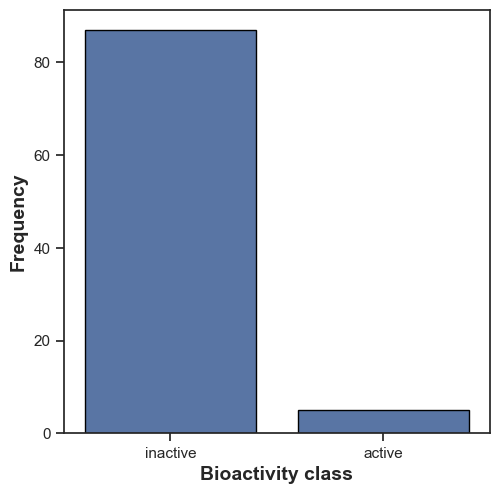

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

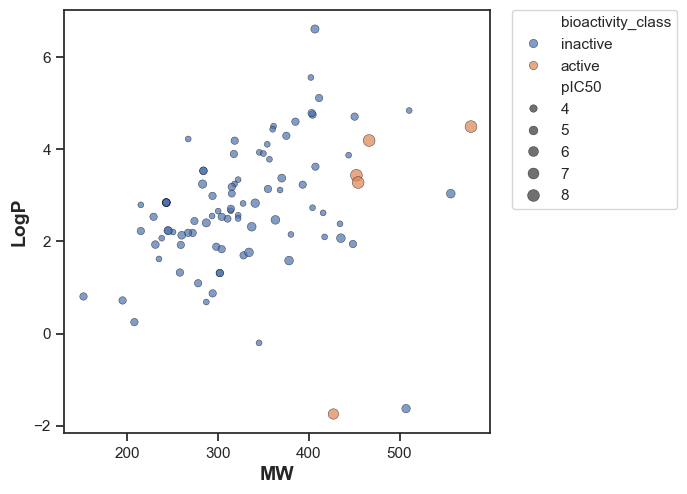

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

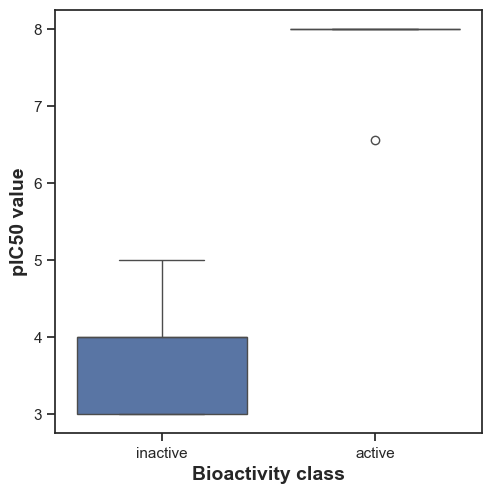

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [56]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [57]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,435.0,0.0001,0.05,Different distribution (reject H0)


#### **MW**

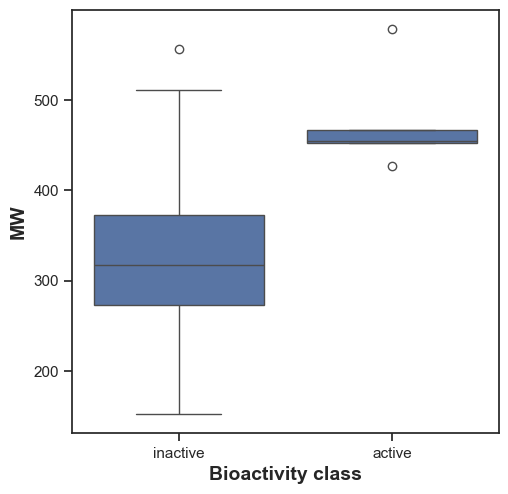

In [58]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [59]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,418.0,0.000572,0.05,Different distribution (reject H0)


#### **LogP**

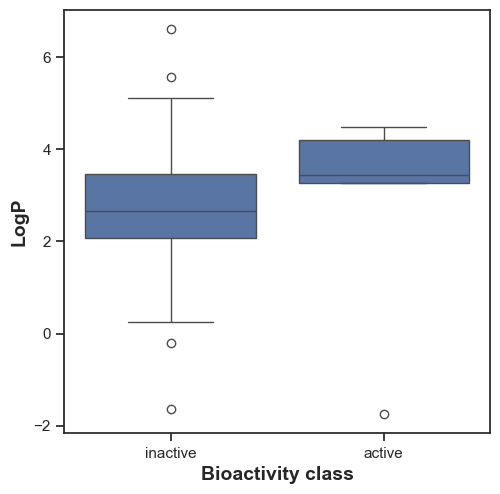

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [61]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,281.0,0.277897,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

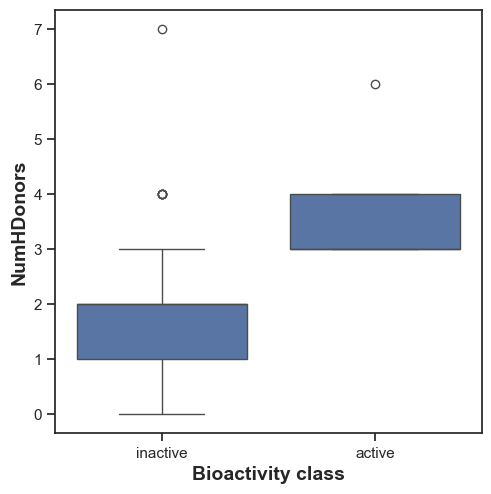

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [63]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,399.0,0.000881,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

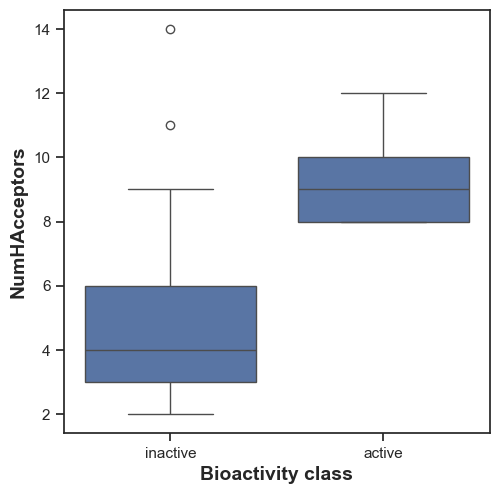

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [65]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,412.5,0.000709,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [66]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: bioactivity_data.csv (deflated 90%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: bioactivity_preprocessed_data.csv (deflated 73%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_MW_vs_LogP.pdf (deflated 18%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
